تشخیص سرطان: Recall مهم‌تر یا Precision؟

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Precision: 0.9459459459459459
Recall: 0.9859154929577465
Confusion Matrix:
 [[39  4]
 [ 1 70]]


چرا RMSE از MAE بزرگ‌تر است؟

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = np.array([100, 120, 130, 150, 1000])  # یک outlier
y_pred = np.array([110, 125, 128, 145, 700])

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 64.4
RMSE: 134.2788144124009


ROC چه چیزی را نشان می‌دهد که Accuracy نمی‌دهد؟

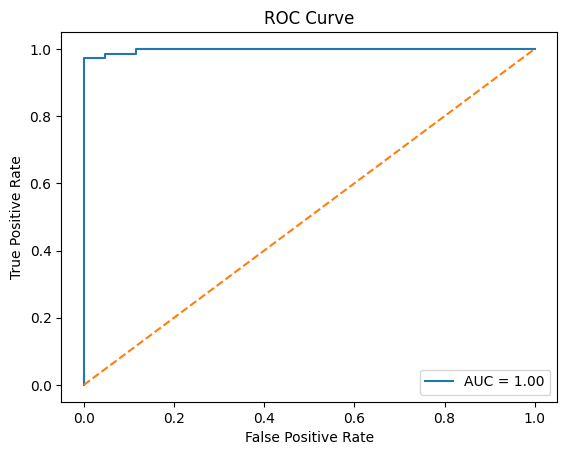

In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
